<a href="https://colab.research.google.com/github/SanjanaSuresh30/ML_LAB_1BM22CS239/blob/main/1BM22CS239_LAB_03_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

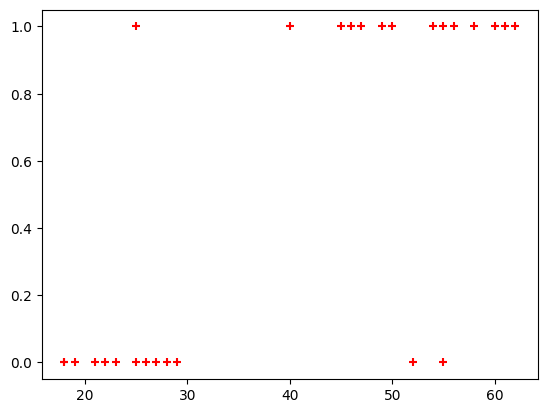

In [2]:
#LOGISTIC REGRESSION FOR BINARY CLASSIFICATION
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("/content/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


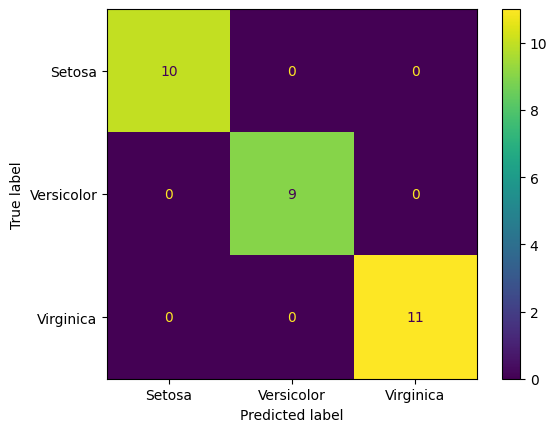

In [3]:
#LOGISTIC REGRESSION FOR MULTICLASS CLASSIFICATION
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("/content/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

Shape of the DataFrame: (14999, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Missing values per column:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       

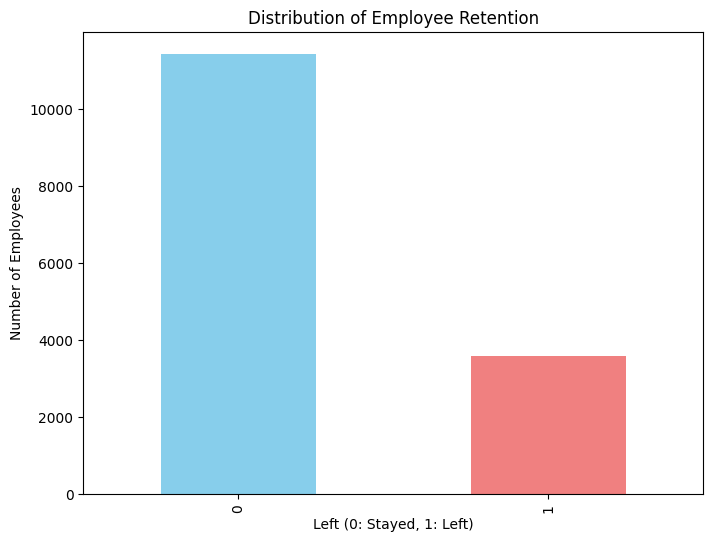


Relationship between 'left' and 'salary':
 salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

Relationship between 'left' and 'Department':
 Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64


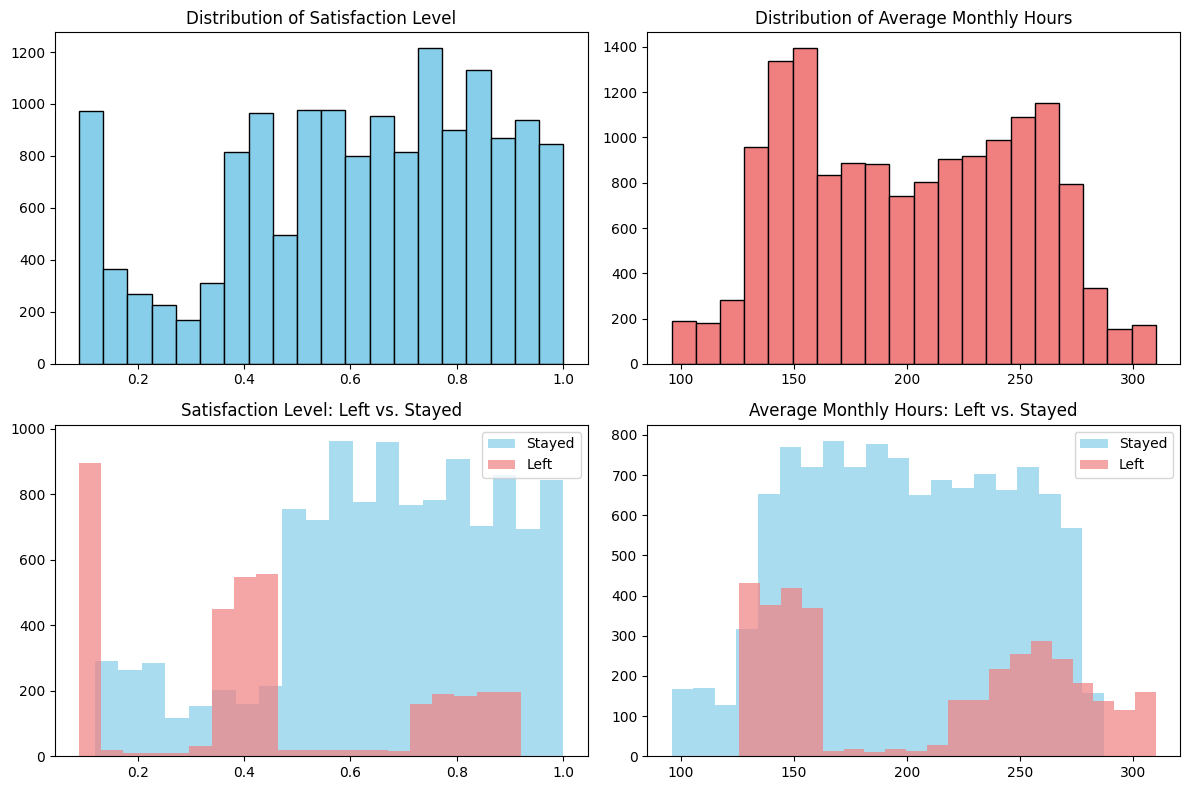

In [11]:
#LOGISTIC REGRESSION FOR BINARY CLASSIFICATION-HR_COMMA_SEP.CSV
import pandas as pd

df=pd.read_csv("/content/HR_comma_sep (2).csv")
# Examine the data's shape and info
print(f"Shape of the DataFrame: {df.shape}")
print("\nInfo:")
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

# Summarize descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Analyze the distribution of the 'left' column
print("\nDistribution of 'left' column:\n", df['left'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['left'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Employee Retention')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Number of Employees')
plt.show()

# Investigate relationships between 'left' and other variables
print("\nRelationship between 'left' and 'salary':\n", df.groupby('salary')['left'].mean())
print("\nRelationship between 'left' and 'Department':\n", df.groupby('Department')['left'].mean())

# Visualize key distributions
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Satisfaction Level')

plt.subplot(2, 2, 2)
plt.hist(df['average_montly_hours'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Average Monthly Hours')

plt.subplot(2, 2, 3)
plt.hist(df[df['left'] == 0]['satisfaction_level'], bins=20, alpha=0.7, label='Stayed', color='skyblue')
plt.hist(df[df['left'] == 1]['satisfaction_level'], bins=20, alpha=0.7, label='Left', color='lightcoral')
plt.title('Satisfaction Level: Left vs. Stayed')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(df[df['left'] == 0]['average_montly_hours'], bins=20, alpha=0.7, label='Stayed', color='skyblue')
plt.hist(df[df['left'] == 1]['average_montly_hours'], bins=20, alpha=0.7, label='Left', color='lightcoral')
plt.title('Average Monthly Hours: Left vs. Stayed')
plt.legend()

plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Convert categorical features to numerical representations and handle potential outliers.


In [3]:
# Salary Encoding: Ordinal encoding (low=1, medium=2, high=3)
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_mapping)

# Department Encoding: One-hot encoding
departments = pd.get_dummies(df['Department'], prefix='dept')
df = pd.concat([df, departments], axis=1)
df = df.drop('Department', axis=1)

display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,False,True,False,False


## Data analysis

### Subtask:
Analyze the relationship between employee retention ('left' column) and other variables.


In [4]:
# Calculate correlations with 'left'
correlations = df.corr()['left']
print("Correlation between 'left' and other numerical features:\n", correlations)

# Analyze relationship between 'left' and 'salary'
salary_retention = df.groupby('salary')['left'].mean()
print("\nAverage employee retention rate for each salary level:\n", salary_retention)

# Analyze relationship between 'left' and departments
department_retention = df.groupby('dept_sales')['left'].mean()
print("\nAverage employee retention rate for Sales department:\n", department_retention)

department_retention = df.groupby('dept_technical')['left'].mean()
print("\nAverage employee retention rate for Technical department:\n", department_retention)

department_retention = df.groupby('dept_support')['left'].mean()
print("\nAverage employee retention rate for Support department:\n", department_retention)

department_retention = df.groupby('dept_product_mng')['left'].mean()
print("\nAverage employee retention rate for Product Management department:\n", department_retention)

department_retention = df.groupby('dept_marketing')['left'].mean()
print("\nAverage employee retention rate for Marketing department:\n", department_retention)

department_retention = df.groupby('dept_management')['left'].mean()
print("\nAverage employee retention rate for Management department:\n", department_retention)

department_retention = df.groupby('dept_hr')['left'].mean()
print("\nAverage employee retention rate for HR department:\n", department_retention)

department_retention = df.groupby('dept_accounting')['left'].mean()
print("\nAverage employee retention rate for Accounting department:\n", department_retention)

department_retention = df.groupby('dept_RandD')['left'].mean()
print("\nAverage employee retention rate for R&D department:\n", department_retention)

department_retention = df.groupby('dept_IT')['left'].mean()
print("\nAverage employee retention rate for IT department:\n", department_retention)

Correlation between 'left' and other numerical features:
 satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
salary                  -0.157898
dept_IT                 -0.010925
dept_RandD              -0.046596
dept_accounting          0.015201
dept_hr                  0.028249
dept_management         -0.046035
dept_marketing          -0.000859
dept_product_mng        -0.011029
dept_sales               0.009923
dept_support             0.010700
dept_technical           0.020076
Name: left, dtype: float64

Average employee retention rate for each salary level:
 salary
1    0.296884
2    0.204313
3    0.066289
Name: left, dtype: float64

Average employee retention rate for Sales department:
 dept_sales
False    0.235473
True     0.244928
Name: left, dtype: float64

Avera

## Data visualization

### Subtask:
Visualize the impact of salary and department on employee retention using bar charts.


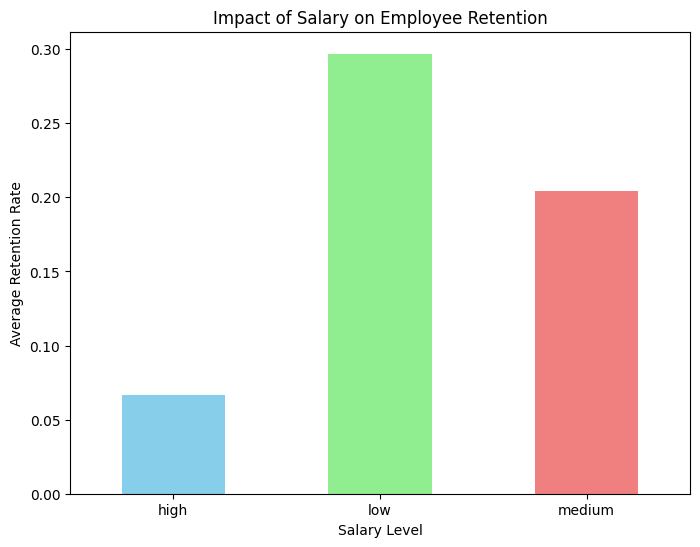

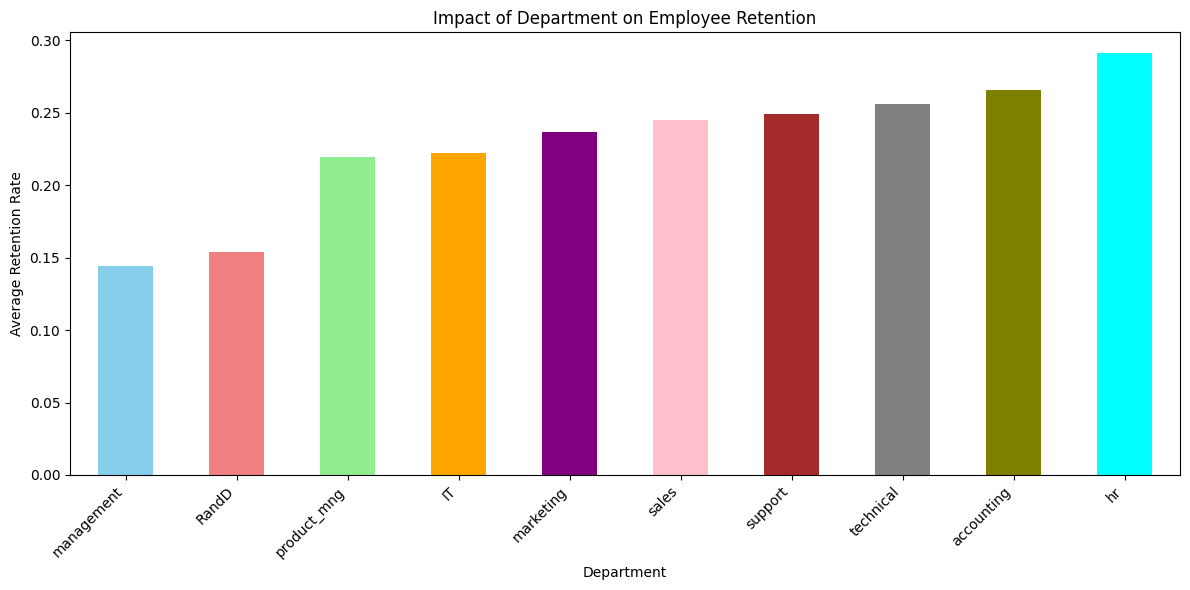

In [12]:
import matplotlib.pyplot as plt

# 1. Salary vs. Retention
plt.figure(figsize=(8, 6))
salary_retention = df.groupby('salary')['left'].mean()
salary_retention.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Average Retention Rate')
plt.xticks(rotation=0)
plt.show()

# 2. Department vs. Retention
plt.figure(figsize=(12, 6))
department_retention = df.groupby('Department')['left'].mean().sort_values()
department_retention.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan'])
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Average Retention Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Select relevant features for the logistic regression model and create a new DataFrame.


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant features based on exploration
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
            'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary',
            'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management',
            'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']
target = 'left'

# Create df_model
df_model = df[features + [target]]

# Apply MinMaxScaler to numerical features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                      'time_spend_company', 'salary']
scaler = MinMaxScaler()
df_model[numerical_features] = scaler.fit_transform(df_model[numerical_features])

display(df_model.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,left
0,0.318681,0.265625,0.0,0.285047,0.125,0,0,0.0,False,False,False,False,False,False,False,True,False,False,1
1,0.780220,0.781250,0.6,0.775701,0.500,0,0,0.5,False,False,False,False,False,False,False,True,False,False,1
2,0.021978,0.812500,1.0,0.822430,0.250,0,0,0.5,False,False,False,False,False,False,False,True,False,False,1
3,0.692308,0.796875,0.6,0.593458,0.375,0,0,0.0,False,False,False,False,False,False,False,True,False,False,1
4,0.307692,0.250000,0.0,0.294393,0.125,0,0,0.0,False,False,False,False,False,False,False,True,False,False,1


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [8]:
from sklearn.model_selection import train_test_split

# Assuming df_model is already created and contains the features and target variable
X = df_model.drop('left', axis=1)
y = df_model['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model training

### Subtask:
Train a logistic regression model on the prepared training data.


**Reasoning**:
Train a logistic regression model using the training data.



In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model evaluation

### Subtask:
Evaluate the trained logistic regression model using the test dataset.


**Reasoning**:
Evaluate the trained logistic regression model using the test dataset. This involves predicting the target variable for the test data, calculating the accuracy, and generating a classification report.



In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")

# Generate and print the classification report
print(classification_report(y_test, y_pred))

Accuracy of the logistic regression model: 0.796
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.62      0.36      0.46       714

    accuracy                           0.80      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.78      0.80      0.78      3000



Logistic Regression Model Accuracy: 0.9524


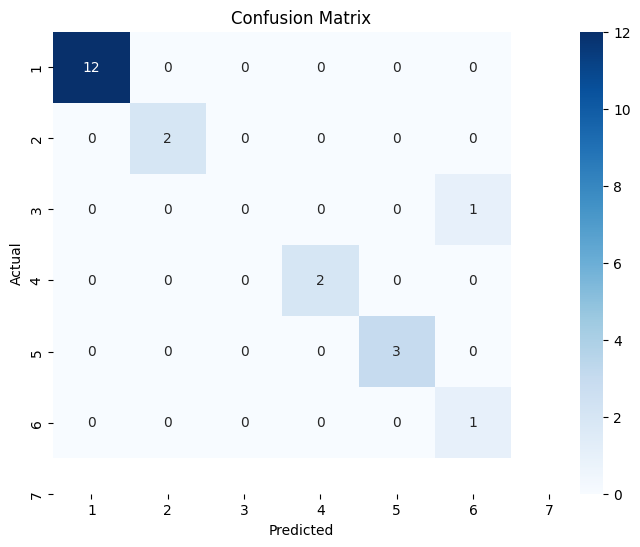

Logistic Regression Model Accuracy: 0.9524


In [15]:
#LOGISTIC REGRESSION FOR MULTICLASS CLASSIFICATION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the datasets
zoo_data_path = "/content/zoo-data (1).csv"
class_type_path = "/content/zoo-class-type (1).csv"
zoo_df = pd.read_csv(zoo_data_path)
class_df = pd.read_csv(class_type_path)

# Merge datasets based on class_type
class_mapping = class_df[['Class_Number', 'Class_Type']].set_index('Class_Number')['Class_Type'].to_dict()
zoo_df['class_label'] = zoo_df['class_type'].map(class_mapping)

# Define features and target
X = zoo_df.drop(columns=['animal_name', 'class_type', 'class_label'])  # Features
y = zoo_df['class_type']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

